X_:  ()
M:  (400, 2)
M_:  (400, 21)
predict:  (400, 1)


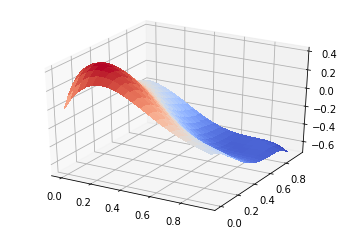

[[ 0.          2.81272843  2.81272843 -7.06943829 -7.06943829 -7.06943829
   3.18443811  3.18443811  3.18443811  3.18443811  3.19304471  3.19304471
   3.19304471  3.19304471  3.19304471 -2.3327129  -2.3327129  -2.3327129
  -2.3327129  -2.3327129  -2.3327129 ]]
ok


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import misc


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

def FrankeFunctionWithNoise(x,y,noise):
    frank = FrankeFunction(x,y)
    return frank + np.random.normal(0, noise, frank.shape)


#Evaluate the mean
def evaluateMean(Y):
	sum = 0.0
	length = len(Y)
	for i in range(length):
		sum = sum + Y[i]
	return sum * (1/length)

#Evaluates the mean squared error
def evaluateMSE(Y,y):
	sum = 0.0
	length = len(Y)
	for i in range(length):
		sum = sum + pow((Y[i]-y[i]),2)
	return sum * (1/length)

#Evaluates the Rsquared 
def evaluateRSquared(Y,y):
	MSE = evaluateMSE(Y,y)
	mean = evaluateMean(Y)
	sum = 0.0
	length = len(Y)
	for i in range(length):
		sum = sum + pow((Y[i]-mean),2)
	return 1 - (MSE/sum)
#Function for making design matrix (stolen from code examples)
def create_Matrix(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)
	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X
#function for finding betavalues (Takes in a design matrix and the y values)
def findBetaValues(X,y):
	XT = X.transpose()
	core = np.matmul(XT, X)
	coreInversed = np.linalg.inv(core)
	XTY = np.matmul(coreInversed, XT)
	B = np.matmul(XTY,y)
	return B

#This function finds the values to the estimated function ( y = Xb ) (Takes in the designmatrix and the betavalues)
def findY(X,b):
	values = []
	for index_row, element_row in enumerate(X):
		row = 0.0;
		for index_column, element_column in enumerate(element_row):
			row = row + (element_column*b[index_column])
		values.append(row)
	return values

def FindBeta(x, y, degree, alpha):
    X = np.c_[x,y]
    poly = PolynomialFeatures(degree)
    X_ = poly.fit_transform(X)
    ridge = linear_model.RidgeCV(alphas=np.array([alpha]))
    ridge.fit(X_, z)
    return ridge.coef_

def RidgeRegression(x, y, z, degree=5, alpha=10**(-6), verbose=False):
    # Split data
    x_train = np.random.rand(100,1)
    y_train = np.random.rand(100,1)
    z = FrankeFunction(x_train,y_train)
    beta = FindBeta(x, y, degree, alpha)

    # show pilot
    poly = PolynomialFeatures(degree)
    x_, y_ = np.meshgrid(x, y)
    x = x_.reshape(-1,1)
    y = y_.reshape(-1,1)
    M = np.c_[x, y]
    M_ = poly.fit_transform(M)
    predict = M_.dot(beta.T)

    if verbose:
        print ("X_: ", np.shape(alpha))
        print ("M: ", np.shape(M))
        print ("M_: ", np.shape(M_))
        print ("predict: ", np.shape(predict))

    # show figure
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x_,y_,predict.reshape(20,20),cmap=cm.coolwarm,linewidth=0,antialiased=False)
    plt.show()

    return beta


if __name__ == '__main__':
    N = 1000000
    #x = np.random.uniform(0, 1, N)
    #y = np.random.uniform(0, 1, N)
    x = np.arange(0, 1, 0.05).reshape((20,1))
    y = np.arange(0, 1, 0.05).reshape((20,1))

    z = FrankeFunction(x,y)
    X = create_Matrix(x,y,5)
    #B = findBetaValues(X,z)
    #Y = findY(X,B)
    #mse = evaluateRSquared(z,Y) # Why z, and y???
    #print("Mean Squre Error = ", mse)
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    #terrain1 = misc.imread('data.tif',flatten=0)
    #x = np.arange(0, 1, 0.05).reshape((20,1))
    #y = np.arange(0, 1, 0.05).reshape((20,1))
    z = FrankeFunction(x, y)

    beta = RidgeRegression(x,y,z,5,5**(-6),True)
    print (beta)

    beta_list = beta.ravel().tolist()
    print ("ok")